<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_PCA_pakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [ ]:
paki = pd.read_csv('/content/Pakistan_COVID19.csv')

In [ ]:
paki

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,Punjab,138,104,6,14226,83,7342
1,Sindh,206,188,2,15104,86,2470
2,KPK,277,234,6,16362,28,26118
3,Balochistan,371,368,4,19607,60,28117
4,Islamabad,243,225,6,9466,89,18861
...,...,...,...,...,...,...,...
495,Punjab,477,458,2,4026,16,14958
496,Sindh,131,81,6,5042,91,11550
497,KPK,465,415,7,2687,56,10936
498,Balochistan,100,84,8,5504,14,11490


In [ ]:
paki.isnull().sum()

,0
Province,0
New_Cases,0
Recoveries,0
Deaths,0
Vaccinations,0
Hospitalized,0
Tests_Conducted,0


In [ ]:
paki.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in paki.select_dtypes(include=['object']).columns:
  paki[i] = le.fit_transform(paki[i])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(paki)


In [ ]:
z = linkage(x_pca,method='ward')

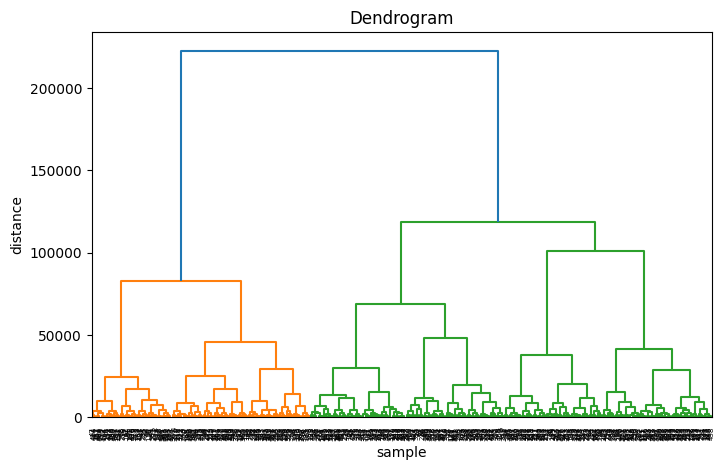

In [ ]:
plt.figure(figsize=(8,5))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('sample')
plt.ylabel('distance')
plt.show()

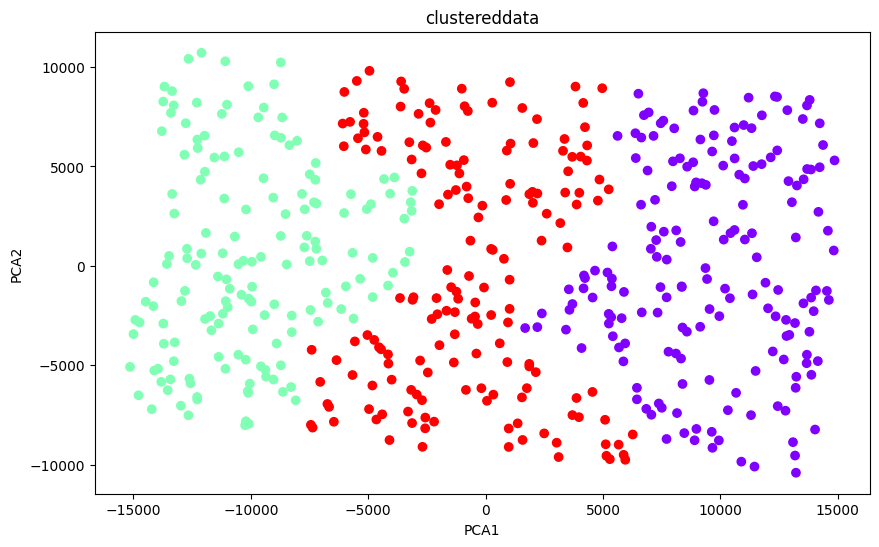

In [ ]:
clusters = fcluster(z,t=3,criterion='maxclust')
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=clusters,cmap='rainbow')
plt.title('clustereddata')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()